In [29]:
from neuron import h
from neuron.units import um, ms, mV
import matplotlib.pyplot as plt
h.load_file("stdrun.hoc")

1.0

In [30]:
axon1 = h.Section(name="axon1")
axon1.L = 20000 * um  # length 20000um
axon1.diam = 8 * um  # diameter 8um
axon1.nseg = 43  # nseg
axon1.insert("hh")  #  Hodgkin-Huxley 
axon1.Ra = 35.4
axon1.cm = 1

axon2 = h.Section(name="axon2")
axon2.L = 20000 * um  # length 20000um
axon2.diam = 4 * um  # diameter 4um
axon2.nseg = 43  # nseg
axon2.insert("hh")  # Hodgkin-Huxley 
axon2.Ra = 35.4
axon2.cm = 1


In [35]:
icalmp = h.IClamp(axon1(0))
icalmp.delay = 0 * ms
icalmp.dur = 30 * ms
icalmp.amp = 1 * ms

iclamp2 = h.IClamp(axon2(0))
iclamp2.delay = icalmp.delay
iclamp2.dur = icalmp.dur
iclamp2.amp = icalmp.amp

In [36]:
v_ax1 = h.Vector().record(axon1(0.5)._ref_v)  # record axon1 membrance potential
v_ax2 = h.Vector().record(axon2(0.5)._ref_v)  # record axon2 membrance potential
t = h.Vector().record(h._ref_t)  # record time

In [37]:
h.finitialize(-65 * mV)  # initial value
h.continuerun(20 * ms)   #  20 ms

0.0

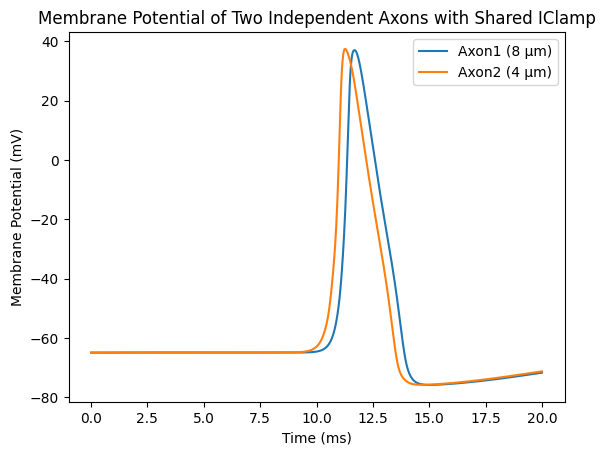

In [38]:
plt.figure()
plt.plot(t, v_ax1, label="Axon1 (8 μm)")
plt.plot(t, v_ax2, label="Axon2 (4 μm)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.title("Membrane Potential of Two Independent Axons with Shared IClamp")
plt.show()